In [128]:
import Pkg; Pkg.add("Plots")

   Resolving package versions...
  No Changes to `C:\Users\laure_wkw4h\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\laure_wkw4h\.julia\environments\v1.8\Manifest.toml`


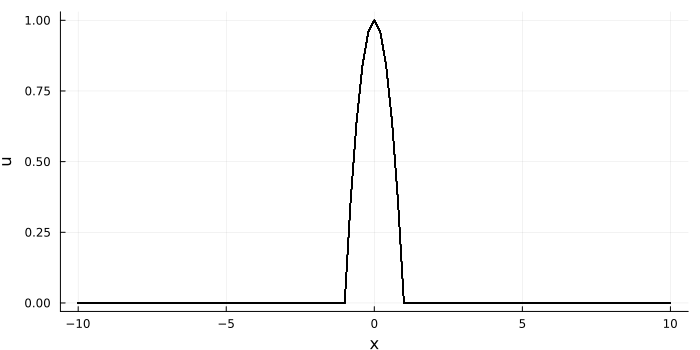

In [129]:
using LinearAlgebra, Plots

# Parameters
L = 10.0                               # domain half size
Nx = 100                             # grid size (space)
Δx = 2*L/Nx                            # step size (space)
σ = 0.51                               # CFL
Δt = 0.0000001                   # step size (time)
Nt = 200                               # grid size (time)
x = range(-L, L, length=Nx+1)          # grid (space)
u0 = max.(0, 1 .- x.^2)                # initial condition
alpha = Δt/Δx^2 #0.51 #test avec 0.51 pour la stabilité.
theta = 0.5


# Explicit scheme
u = u0
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:green, legend=false)

A = Tridiagonal((1-theta)*-alpha*ones(Nx),ones(Nx+1)+2*alpha*ones(Nx+1)*(1-theta),(1-theta)*-alpha*ones(Nx))
B = Tridiagonal(theta*alpha*ones(Nx), ones(Nx+1)-2*alpha*ones(Nx+1)*theta, theta*alpha*ones(Nx))

for n = 1:Nt
    u = A\(B*u)
    if mod(n, Nt/200) == 0
        plot!(u_plot, x, u, xlabel="x", ylabel="u", color=:black, legend=false)
    end
end
display(plot(u_plot, size=(700, 350)))

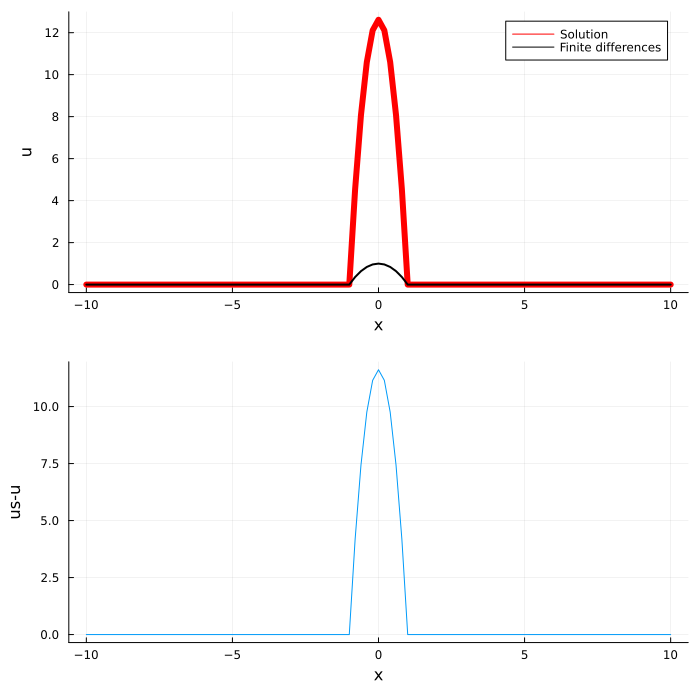

Δx: 0.2	 Δt:1.0e-7	 max error: 11.615702610100776


In [130]:
# Comparison with exact solution (computed convoluting with Gaussian kernel)
us = zeros(Nx+1)
ker = exp.( -((0:Nx)*Δx).^2 / (4*Nt*Δt) )
kmax = findall(x -> x < 1e-14, ker)
kmax = length(kmax) > 0 ? kmax[1] : error("Increase Nx")

for j = 1:(Nx+1)
    jmin = max(1, j-kmax)
    jmax = min(Nx+1, j+kmax)
    us[j] = Δx * sum( u0[jmin:jmax].*ker[1 .+ abs.(j.-(jmin:jmax))] ) / sqrt(4*π*Nt*Δt)
end

err = us-u
us_plot = plot(x, us, xlabel="x", ylabel="us", color=:red, label="Solution", lw=6)
plot!(us_plot, x, u, xlabel="x", ylabel="u", color=:black, label="Finite differences", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="us-u", legend=false)
display(plot(us_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

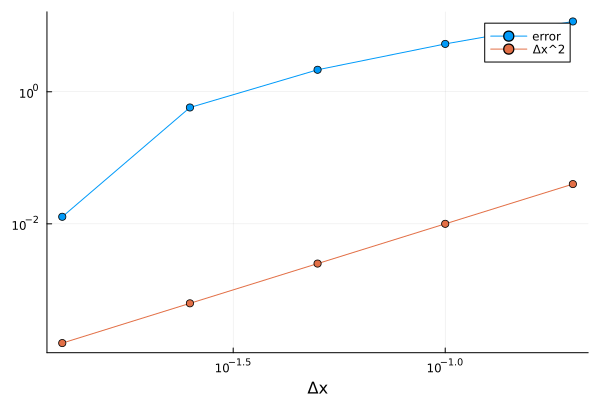

In [131]:
# Precision test
Δx = [ 0.2, 0.1, 0.05, 0.025, 0.0125 ]
#Theta = 1/2
#errx = [ 11.615702610100776, 5.3078713050504005, 2.1539556525253767, 0.5782732453604735, 0.012781891720156202]

#Theta 0.25
#errx = [ 11.615702610100803, 5.307871305050414, 2.153955652525384, 0.5782732453604738, 0.012781891720174188]

#Theta 0.75
errx = [ 11.615702610100794, 5.307871305050419, 2.153955652525339, 0.5782732453605032,0.012781891720175409]

plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")

In [132]:
# Precision test
Δt = [ 0.2, 0.1, 0.05, 0.025, 0.0125 ]

#L'execution est trop longue pour avoir tous les résultats

errx = []

plot(Δt, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δt", label="error")
plot!(Δt, Δt^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δt", label="Δt^2")

┌ Warning: Keyword argument letter not supported with Plots.GRBackend().  Choose from: annotations, arrow, aspect_ratio, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, connections, contour_labels, discrete_values, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotation, guidefontsize, guidefontvalign, html_output_format, inset_subplots, label, layout, left_margin, legend_background_color, legend_font_color, legend_font_family, legend_font_halign, legend_font_pointsize, legend_font_rotation, legend_font_valign, legend_foreground_color, legend_positio

LoadError: MethodError: no method matching ^(::Vector{Float64}, ::Int64)
[0mClosest candidates are:
[0m  ^([91m::Union{AbstractChar, AbstractString}[39m, ::Integer) at strings/basic.jl:730
[0m  ^([91m::Symmetric{var"#s885", S} where {var"#s885"<:Real, S<:(AbstractMatrix{<:var"#s885"})}[39m, ::Integer) at C:\Users\laure_wkw4h\AppData\Local\Programs\Julia-1.8.2\share\julia\stdlib\v1.8\LinearAlgebra\src\symmetric.jl:674
[0m  ^([91m::Symmetric{var"#s885", S} where {var"#s885"<:Complex, S<:(AbstractMatrix{<:var"#s885"})}[39m, ::Integer) at C:\Users\laure_wkw4h\AppData\Local\Programs\Julia-1.8.2\share\julia\stdlib\v1.8\LinearAlgebra\src\symmetric.jl:675
[0m  ...

# Tâche 2

### Question 3.
Changer la valeur de $\Theta$ ne modifie quasiment pas l'erreur en espace. La précision semble légèrement meilleure lorsque $\Theta$ est à 1/2.

Lorsque l'on fixe Δx et que l'on modifie Δt, on observe, pour $\Theta$ = 1/2, que la droite associée à l'évolution de l'erreur est parallèle à celle représentant l'évolution quadratique de Δt. Ainsi, la diminution de l'erreur est proportionnelle à la diminution de Δt². On comprend donc que l'erreur est d'ordre 2 en temps pour $\Theta$ = 1/2.

### Question 4
En modifiant la valeur de σ (supérieur à 0.5 strictement), lorsque $\Theta$ se rapproche de 1, on observe que l'on perd la stabilité car on se rapproche d'un schéma explicite.